In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
np.random.seed(42)

In [13]:
months=pd.date_range(start="2024-06-01",periods=12,freq='ME')
data=pd.DataFrame({
    "Month":months,
    "Marketing_Spend":np.random.uniform(100,500,size=12),
    "Promotion_Flag":np.random.choice([0,1],size=12),
    "Season": np.random.choice(['Winter', 'Spring', 'Summer', 'Fall'], size=12),
    "Product_Category": np.random.choice(['A', 'B', 'C'], size=12),
    "Channel": np.random.choice(['Online', 'Retail', 'Distributor'], size=12),
})

In [19]:
data["Revenue"] = (
    60 +
    0.6 * data["Marketing_Spend"] +
    25 * data["Promotion_Flag"] +
    np.random.normal(0, 20, size=12)
)

In [21]:
data_encoded = pd.get_dummies(data.drop(columns=["Month"]), drop_first=True)

In [23]:
X = data_encoded.drop("Revenue", axis=1)
y = data_encoded["Revenue"]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [25]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

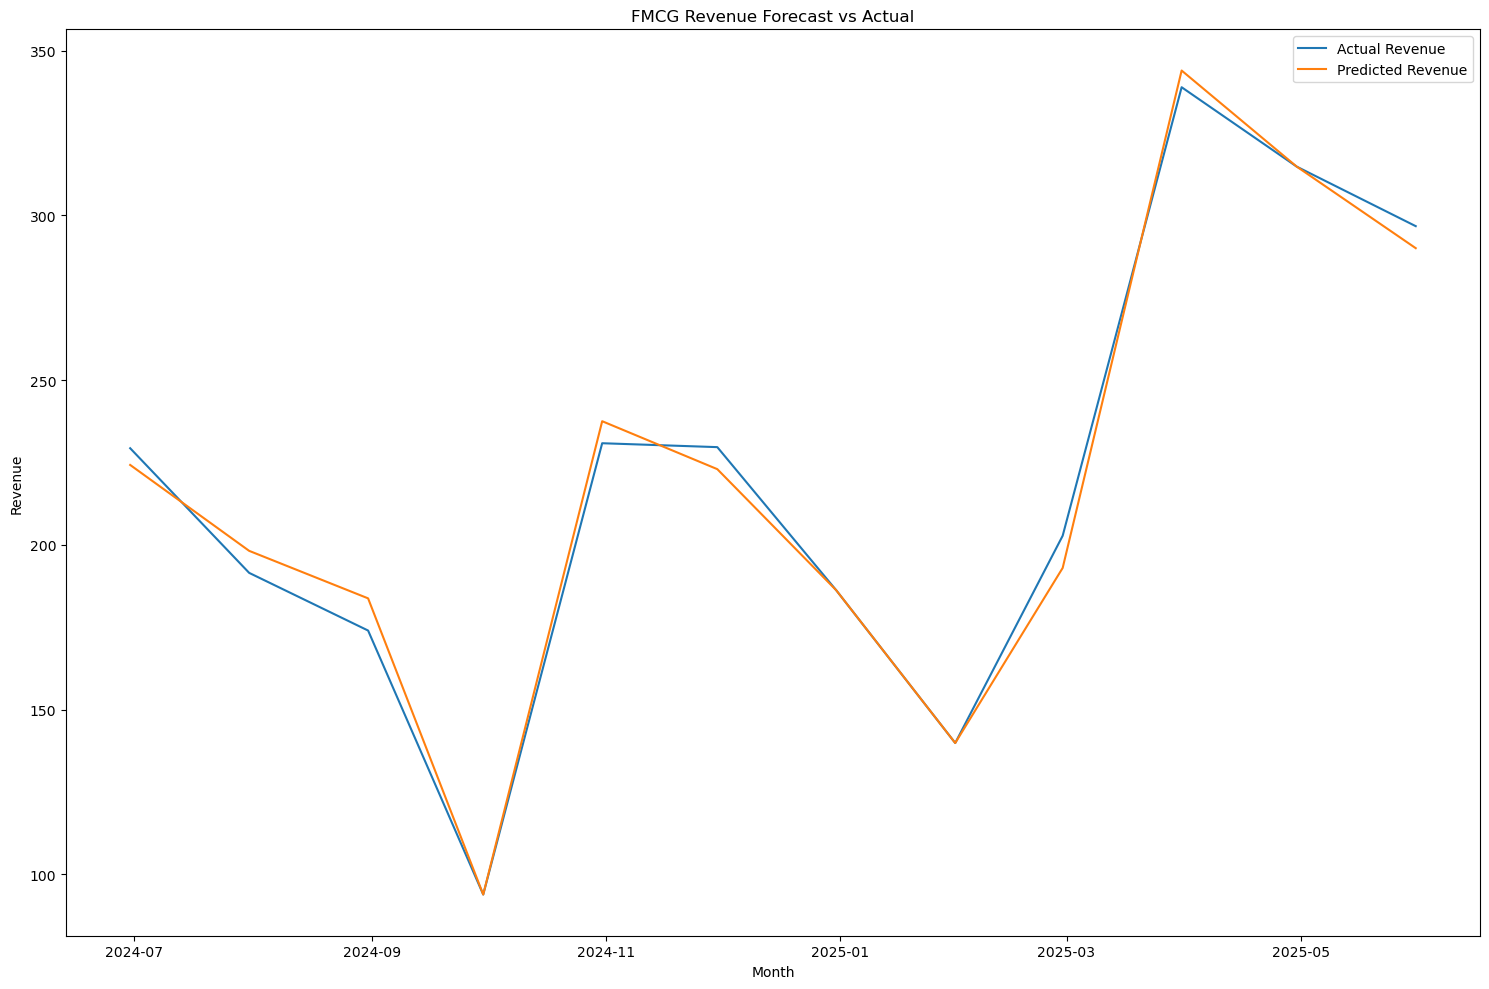

In [27]:
plt.figure(figsize=(15,10))
sns.lineplot(x=months, y=y, label='Actual Revenue')
sns.lineplot(x=months, y=y_pred, label='Predicted Revenue')
plt.title("FMCG Revenue Forecast vs Actual")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 0.99
Mean Squared Error: 35.08
